In [84]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [85]:
X,y = make_classification(n_samples = 100, n_features=2, n_informative=1, n_redundant=0,  n_classes=2, 
                          n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [86]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [87]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

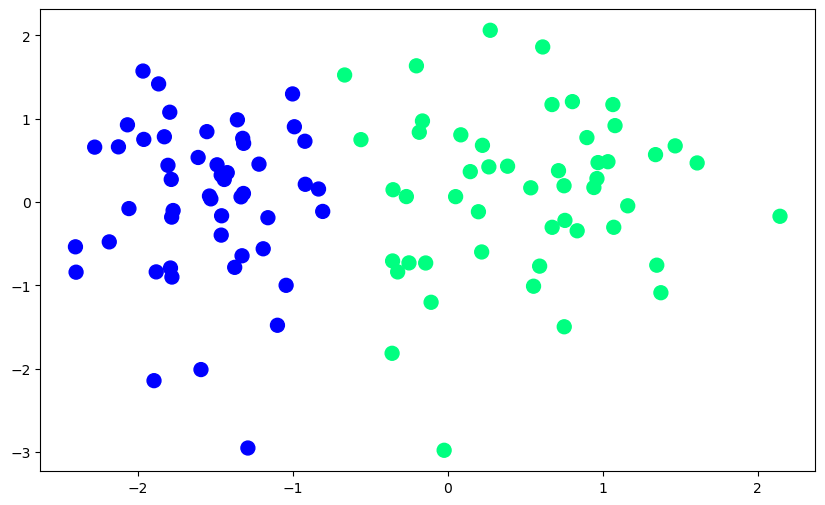

In [101]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

# perceptron Trick:
  * for i in range(epochs = 1000):
      * choose random number from traning data like Xi
      * Wnew = Wold + learning_Rate(Yi-Yhat)Xi

In [89]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(1000):
        ran_num = np.random.randint(0,100)
        y_hat = step(np.dot(X[ran_num],weights))
        weights = weights + lr * (y[ran_num]-y_hat) * X[ran_num]
        
    return weights[0],weights[1:]

In [90]:
def step(z):
    return 1 if z>0 else 0

In [91]:
intercept_,coef_ = perceptron(X,y)

In [92]:
print(intercept_)
print(coef_)

1.0
[1.40701217 0.03327195]


In [93]:
m = -(coef_[0]/coef_[1])  # m = -(1.41924665 / 0.19588654)
b = -(intercept_/coef_[1]) # b = -(0.9 / 19588654 )

In [94]:
m,b

(-42.28823269441649, -30.055342480488434)

In [95]:
x_input = np.linspace(-3,3,100) 
y_input = m*x_input + b    # y_input = m * Xi + b

(-3.0, 2.0)

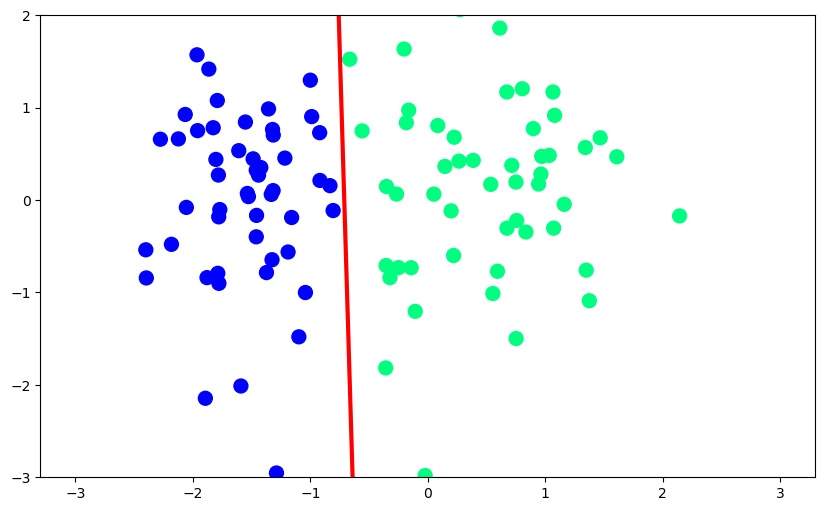

In [96]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Logistic Regression:

In [97]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [98]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [99]:
x_input1 = np.linspace(-3,3,100) 
y_input1 = m*x_input + b    # y_input = m * Xi + b

(-3.0, 2.0)

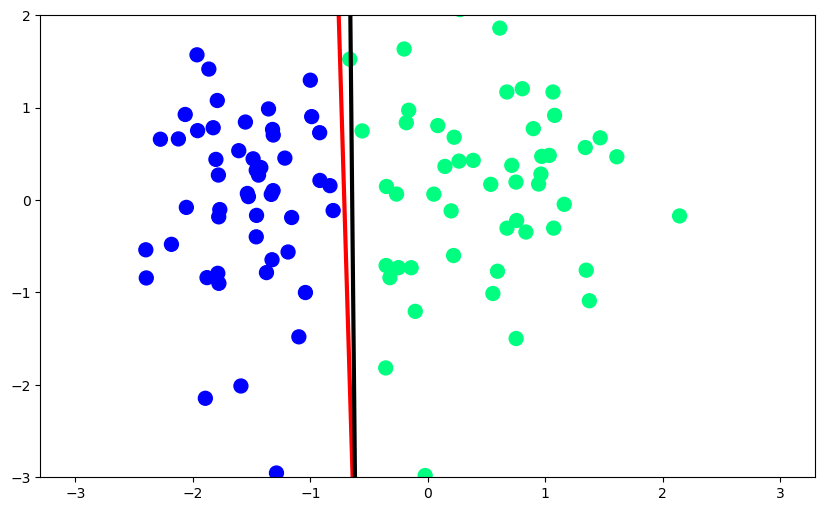

In [100]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Sigmoaid Fucntion:
    * sigmoid(z)= 1 / 1 + exp(-z)

In [102]:
def sigmoaid(z):
    return 1/1+ np.exp(-z)

In [104]:
intercept_,coef_ = perceptron(X,y)

In [105]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [106]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

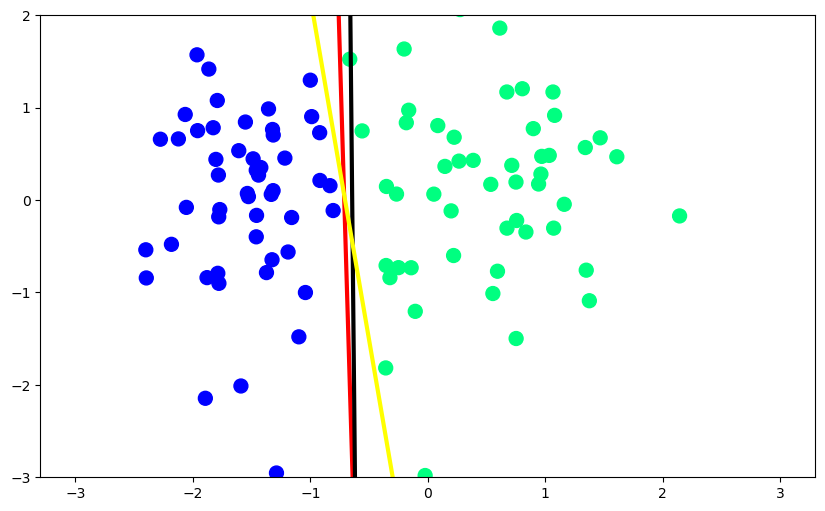

In [108]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='yellow',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Gradient decent :

In [148]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoaid(np.dot(X,weights))    # y_hat = sigmoaid(x*w)
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])  #w = w + learning_rate((y-y_hat) * X) / X 
        
    return weights[1:],weights[0]
        

In [149]:
def sigmoaid(z):
    return 1/1+ np.exp(-z)

In [150]:
intercept_,coef_ = gd(X,y)

C:\Users\Ijaz Ul Hassan\AppData\Local\Temp\ipykernel_15440\3837948587.py:2: RuntimeWarning: overflow encountered in exp
  return 1/1+ np.exp(-z)


In [151]:
print(intercept_)
print(coef_)

[nan nan]
nan


In [153]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

IndexError: invalid index to scalar variable.

In [143]:
print(m1)
print(b1)

20.18977165556376
15.581689770295885


In [144]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input1 + b

In [145]:
print(x_input3)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [146]:
print(y_input3)

[-44.9876252  -43.76400267 -42.54038015 -41.31675762 -40.0931351
 -38.86951257 -37.64589005 -36.42226752 -35.198645   -33.97502248
 -32.75139995 -31.52777743 -30.3041549  -29.08053238 -27.85690985
 -26.63328733 -25.4096648  -24.18604228 -22.96241975 -21.73879723
 -20.5151747  -19.29155218 -18.06792966 -16.84430713 -15.62068461
 -14.39706208 -13.17343956 -11.94981703 -10.72619451  -9.50257198
  -8.27894946  -7.05532693  -5.83170441  -4.60808189  -3.38445936
  -2.16083684  -0.93721431   0.28640821   1.51003074   2.73365326
   3.95727579   5.18089831   6.40452084   7.62814336   8.85176589
  10.07538841  11.29901093  12.52263346  13.74625598  14.96987851
  16.19350103  17.41712356  18.64074608  19.86436861  21.08799113
  22.31161366  23.53523618  24.7588587   25.98248123  27.20610375
  28.42972628  29.6533488   30.87697133  32.10059385  33.32421638
  34.5478389   35.77146143  36.99508395  38.21870648  39.442329
  40.66595152  41.88957405  43.11319657  44.3368191   45.56044162
  46.78406415

(-3.0, 2.0)

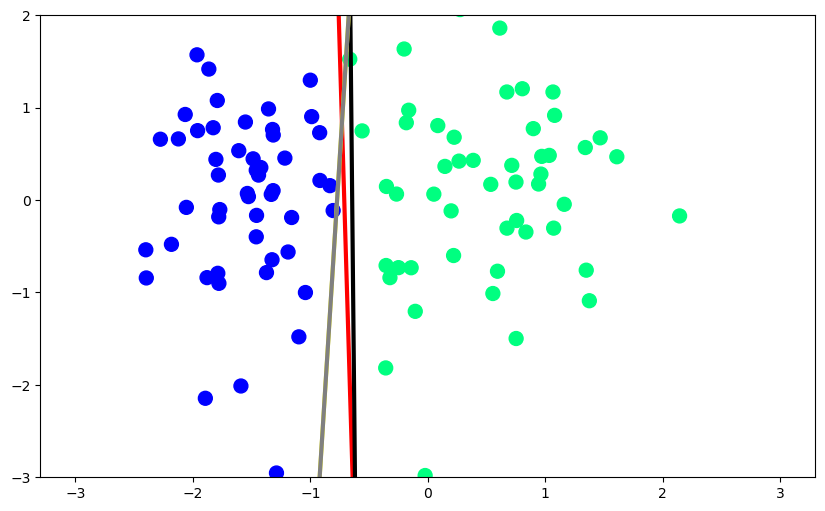

In [147]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='yellow',linewidth=3)
plt.plot(x_input3,y_input3,color='gray',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)